In [1]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data.csv")

def nevus_permutation(x, y, permIter = 100):    
    
    OutB = [] # Output a array, store each trial's a
    perm_xdata = x
    for i in range(permIter):
        perm_xdata = np.random.permutation(perm_xdata) # permutate nonlocal xdata to update, don't change ydata

        true_false_list = y == "['nevus']"

        numerator = np.unique(perm_xdata[true_false_list], return_counts=True)[1]
        denominator = np.sum(np.unique(perm_xdata[true_false_list], return_counts=True)[1])

        ratio = numerator/denominator

        OutB.append(ratio[1])                   
    return(OutB)

def melanoma_permutation(x, y, permIter = 100):    
    
    OutB = [] # Output a array, store each trial's a
    perm_xdata = x
    for i in range(permIter):
        perm_xdata = np.random.permutation(perm_xdata) # permutate nonlocal xdata to update, don't change ydata #THATS MOST IMPORTANT

        true_false_list = y == "['melanoma']"

        numerator = np.unique(perm_xdata[true_false_list], return_counts=True)[1]
        denominator = np.sum(np.unique(perm_xdata[true_false_list], return_counts=True)[1])

        ratio = numerator/denominator

        OutB.append(ratio[0])                   
    return(OutB)

# values for permutation
y = data['current_correct_answer'].shift(periods = 1)
x = data['chosen_answer']

In [3]:
#1-back nevus permutation
nevus_ratios = nevus_permutation(x = x, y = y, permIter = 5000)

plt.hist(nevus_ratios, bins = 500)
one_back_nevus = data['current_correct_answer'].shift(periods = 1) == "['nevus']"
nevus_current_ratio = data['chosen_answer'][one_back_nevus].value_counts(1)["['nevus']"]
plt.axvline(x=nevus_current_ratio, color='g')
plt.axvline(x=np.percentile(a = nevus_ratios, q = 95), color='r')

In [ ]:
# 1-back melanoma permutation
melanoma_ratios = melanoma_permutation(x = x, y = y, permIter = 5000)

plt.hist(melanoma_ratios, bins = 500)
one_back_melanoma = data['current_correct_answer'].shift(periods = 1) == "['melanoma']"
melanoma_current_ratio = data['chosen_answer'][one_back_melanoma].value_counts(1)[['melanoma']]
plt.axvline(x=melanoma_current_ratio, color='g')
plt.axvline(x=np.percentile(a = melanoma_ratios, q = 95), color='r')

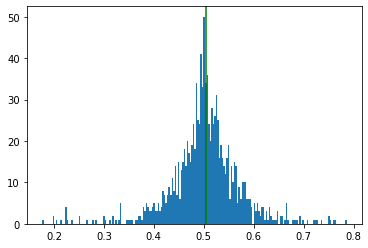

In [4]:
# TO DO 1: LOOK AT INDIVIDUAL SUBJECT RATIOS
data_per_user = data.groupby(['user_id']).mean()

#1-back ratio per subject plot
plt.hist(data_per_user['1back_accuracy'], bins=200)
mean_1back_accuracy = data['1back_accuracy'].value_counts(1)[1]
plt.axvline(x=mean_1back_accuracy, color='g')

In [8]:
# TO DO 2: CALCULATE DIFFICULTY FOR IMAGES
data_per_image = data.groupby(['origin']).mean()
data_per_image = data_per_image.sort_values(by=["score"])

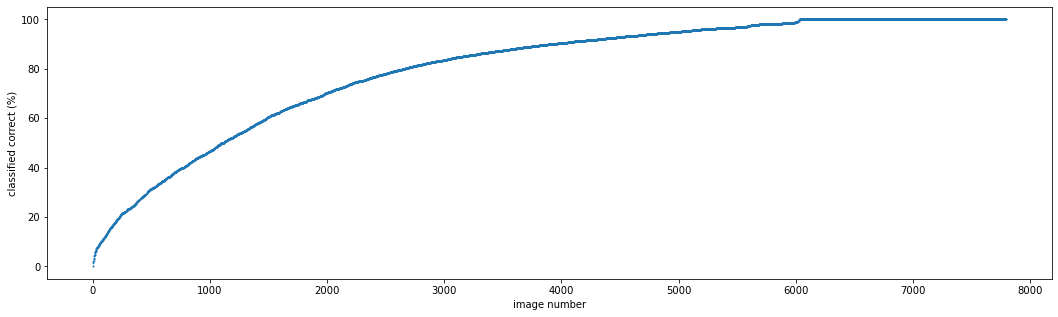

In [134]:
# Over all images
x = np.arange(0, combined_images.shape[0],).tolist()
y = data_per_image['score']
plt.figure(figsize=(18, 5))
plt.scatter(x,y,s=0.5)
plt.ylabel('classified correct (%)')
plt.xlabel('image number')
plt.show()

In [9]:
# For malginant and benign images each
images = np.unique(data['origin'])

image_class = []
for i in images:
    tmp_label = data.loc[data['origin'] == i]['current_correct_answer'].iloc[0]
    image_class.append(tmp_label)
    
sort_by_image_id = data_per_image.sort_index()[:len(images)] #sort images by image name
sort_by_image_id['class'] = image_class

# retrieve melanoma and nevus images
melanoma = sort_by_image_id.loc[sort_by_image_id['class']=="['melanoma']"]
nevus = sort_by_image_id.loc[sort_by_image_id['class']=="['nevus']"]

#sort melanoma descending, nevus ascending
melanoma.sort_values(by=["score"], ascending = False, inplace = True)
nevus.sort_values(by=["score"], inplace = True)
combined_images = melanoma.append(nevus)

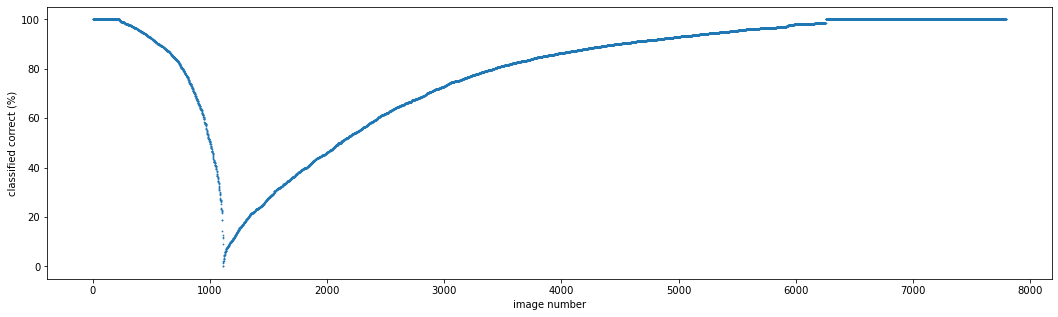

In [136]:
# U-shaped plot (More like a V)
x = np.arange(0, combined_images.shape[0],).tolist()
y = combined_images['score']
plt.figure(figsize=(18, 5))
plt.scatter(x,y,s=0.5)
plt.ylabel('classified correct (%)')
plt.xlabel('image number')
plt.show()

In [13]:
# number of melanoma images: 1110, min times an image was shown: 95, max: 380:
data['origin'][data['current_correct_answer']== "['melanoma']"].value_counts() 

# number of nevus images: 6688, min times an image was shown: 34, max: 106:
data['origin'][data['current_correct_answer']== "['nevus']"].value_counts() 

In [14]:
# TO DO 3: LOOK AT RATIOS OF CORRECT AND INCORRECT TRIALS EACH

# melanoma plot FOR INCORRECT TRIALS
y = data['current_correct_answer'].shift(periods = 1)[data['score'] == 0]
x = data['chosen_answer'][data['score'] == 0]

melanoma_ratios = melanoma_permutation(x = x, y = y, permIter = 1000)

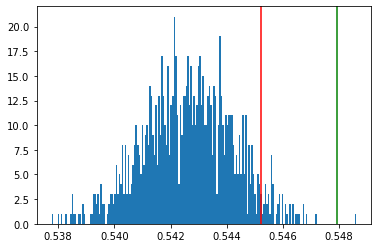

In [18]:
plt.hist(melanoma_ratios, bins = 200)
one_back_melanoma = data['current_correct_answer'].shift(periods = 1) == "['melanoma']"
melanoma_ratio_all = data['chosen_answer'][one_back_melanoma].value_counts(1)[1]
melanoma_ratio_incorrect = data['chosen_answer'][data['score'] == 0][one_back_melanoma].value_counts(1)["['melanoma']"]

#plt.axvline(x=melanoma_ratio_all, color='b') # mean ratio for melanoma across correct AND incorrect trials
plt.axvline(x=melanoma_ratio_incorrect, color='g')
plt.axvline(x=np.percentile(a = melanoma_ratios, q = 95), color='r')

In [19]:
# melanoma plot FOR CORRECT ANSWERS
y = data['current_correct_answer'].shift(periods = 1)[data['score'] == 100]
x = data['chosen_answer'][data['score'] == 100]

melanoma_ratios = melanoma_permutation(x = x, y = y, permIter = 1000)

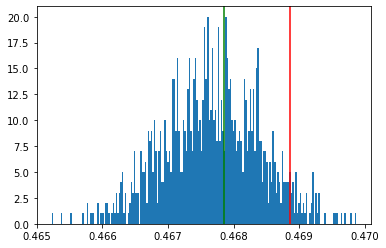

In [20]:
plt.hist(melanoma_ratios, bins = 200)
one_back_melanoma = data['current_correct_answer'].shift(periods = 1) == "['melanoma']"
melanoma_ratio_all = data['chosen_answer'][one_back_melanoma].value_counts(1)["['melanoma']"]
melanoma_ratio_incorrect = data['chosen_answer'][data['score'] == 100][one_back_melanoma].value_counts(1)["['melanoma']"]

#plt.axvline(x=melanoma_ratio_all, color='b') # mean ratio for melanoma across correct AND incorrect trials
plt.axvline(x=melanoma_ratio_incorrect, color='g')
plt.axvline(x=np.percentile(a = melanoma_ratios, q = 95), color='r')